# USA 2020 First Presidential Debate Analysis w/ Python

## Introduction

In this project, I will be using web scraping tools for Python to have a clear sight of the most common word used by both presidential candidates, the republican Donald Trump and the democrat Joe Biden.

After retrieving the data using <b>BeautifulSoup</b>, the package <b>WordCloud</b> will be used to convert the obtained text into a wordcloud image to focus on the words used in it by both candidates.

Also, the 10 most common words used by each person will be represented by <b>Matplotlib</b>. The goal is to highlight and compare the speeches between the incumbent president and the challenger, watching how the most used words differ.

At the end, the results will be analysed in a superficial way as the main goal for this project is to practice my Python libraries skills.

## Data

The data used for this project was scraped from the Comission on Presidential Debates site at https://www.debates.org/voter-education/debate-transcripts/september-29-2020-debate-transcript/ and then cleaned due to its sintaxis as the text uses debate dialogue structure.
The transcription of the debate from September 29 of 2020 was used, it was the first debate of the 2020 presidential campaign and it took part at Cleveland, Ohio.
The technologies used here were Jupyter notebooks in Python and GitHub for repository.

# Methodology

## Scraping data from Wikipedia using BeautifulSoup

In [3]:
#Import requests for web scraping
import pandas as pd
import requests as rq
import numpy as np
import collections

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

import matplotlib as mpl
import matplotlib.pyplot as plt

# import k-means from clustering stage
from PIL import Image 
from matplotlib import rcParams

In [6]:
# Bring the data from the target URL
website_url= rq.get('https://www.debates.org/voter-education/debate-transcripts/september-29-2020-debate-transcript/').text 

## Now we shall use BeautifulSoup library

In [7]:
#Import BeautifulSoup for html structure information from our request
from bs4 import BeautifulSoup
soup = BeautifulSoup(website_url,'lxml')

data = [element.text for element in soup.find_all("p")] #Retrieving text from "p" founds
data = str(data) #Convert to string
data

"['Presidential Debate at Case Western Reserve University and Cleveland Clinic in Cleveland, Ohio', 'September 29, 2020', 'PARTICIPANTS:\\nFormer Vice President Joe Biden (D) and\\nPresident Donald Trump (R)', 'MODERATOR:\\nChris Wallace (Fox News)', 'WALLACE:\\xa0Good evening from the Health Education Campus of Case Western Reserve University and the Cleveland Clinic. I’m Chris Wallace of Fox News and I welcome you to the first of the 2020 presidential debates between President Donald J. Trump and former Vice President Joe Biden. This debate is sponsored by the Commission on Presidential Debates. The Commission has designed the format, six roughly 15-minute segments with two-minute answers from each candidate to the first question, then open discussion for the rest of each segment. Both campaigns have agreed to these rules. For the record, I decided the topics and the questions in each topic. I can assure you none of the questions has been shared with the Commission or the two candida

## Cleaning the data

In [9]:
# to divide the speeches of the two candidates, first we split the data using the word "TRUMP"
data_t = data.split('TRUMP')

In [10]:
# then, we split the word "BIDEN" and only keep Trump's quotes.
data_tb = []
aux_tb = []
for i in range(len(data_t)-1):
    
    aux_tb.append(data_t[i].split('BIDEN'))
        
    data_tb.append(aux_tb[i][0].lstrip(':\\xa0'))

In [11]:
# now, we split the word "WALLACE" to remove the moderator's quotes.
data_tbw = []
aux_tbw = []
for i in range(len(data_tb)-1):
    
    aux_tbw.append(data_tb[i].split('WALLACE'))
    
    data_tbw.append(aux_tbw[i][0].lstrip(':\\xa0'))

In [13]:
# the result is this one, an array of Trump's quotes.
data_tbw

["['Presidential Debate at Case Western Reserve University and Cleveland Clinic in Cleveland, Ohio', 'September 29, 2020', 'PARTICIPANTS:\\nFormer Vice President Joe Biden (D) and\\nPresident Donald Trump (R)', 'MODERATOR:\\nChris Wallace (Fox News)', '",
 "How are you doing?', '",
 "Thank you very much, Chris. I will tell you very simply. We won the election. Elections have consequences. We have the Senate, we have the White House, and we have a phenomenal nominee respected by all. Top, top academic, good in every way. Good in every way. In fact, some of her biggest endorsers are very liberal people from Notre Dame and other places. So I think she’s going to be fantastic. We have plenty of time. Even if we did it after the election itself. I have a lot of time after the election, as you know. So I think that she will be outstanding. She’s going to be as good as anybody that has served on that court. We really feel that. We have a professor at Notre Dame, highly respected by all, said 

In [14]:
# we remove the first element because it isn't a Trump quote, it's just the deabate introduction.
data_tbw.pop(0)

"['Presidential Debate at Case Western Reserve University and Cleveland Clinic in Cleveland, Ohio', 'September 29, 2020', 'PARTICIPANTS:\\nFormer Vice President Joe Biden (D) and\\nPresident Donald Trump (R)', 'MODERATOR:\\nChris Wallace (Fox News)', '"

In [18]:
# now, we join every array into a string
data_trump = ''.join(data_tbw)
# it has a length of 41052 words in total
len(data_trump)

41052

In [22]:
# the transcription had a mistake using the wrong apostrophe, so we fix this to avoid future errors.
data_trump_clean = data_trump.replace("’", "'")
# also, all the string is converted to lowercase
data_trump_clean = data_trump_clean.lower()

In [24]:
# finally, we have a string of all the Trump's quotes clean and ready for the next steps
data_trump_clean

"how are you doing?', 'thank you very much, chris. i will tell you very simply. we won the election. elections have consequences. we have the senate, we have the white house, and we have a phenomenal nominee respected by all. top, top academic, good in every way. good in every way. in fact, some of her biggest endorsers are very liberal people from notre dame and other places. so i think she's going to be fantastic. we have plenty of time. even if we did it after the election itself. i have a lot of time after the election, as you know. so i think that she will be outstanding. she's going to be as good as anybody that has served on that court. we really feel that. we have a professor at notre dame, highly respected by all, said she's the single greatest student he's ever had. he's been a professor for a long time at a great school.', 'and we won the election and therefore we have the right to choose her, and very few people knowingly would say otherwise. and by the way, the democrats, 

## What are the Word Clouds ?

A word cloud is a collection, or cluster, of words depicted in different sizes. The bigger and bolder the word appears, the more often it’s mentioned within a given text and the more important it is. For this task, we will be using the python library called 'word_cloud' developed by <b>Andreas Mueller</b>.

In [25]:
from stop_words import get_stop_words #The words we want to ignore
stop_words_en = get_stop_words('en') #English StopWords

In [26]:
from wordcloud import WordCloud, STOPWORDS

In [27]:
stop_words = [".", ".',", "'i", "it.", "'you"] + stop_words_en #Adding aditional StopWords to avoid mistakes
#initiate world cloud object
trump_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stop_words
)

# generate the word cloud
trump_wc.generate(data_trump_clean)

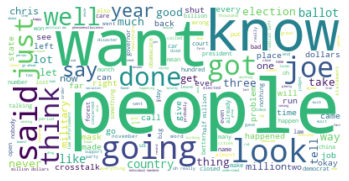

In [28]:
# display the word cloud
plt.imshow(trump_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

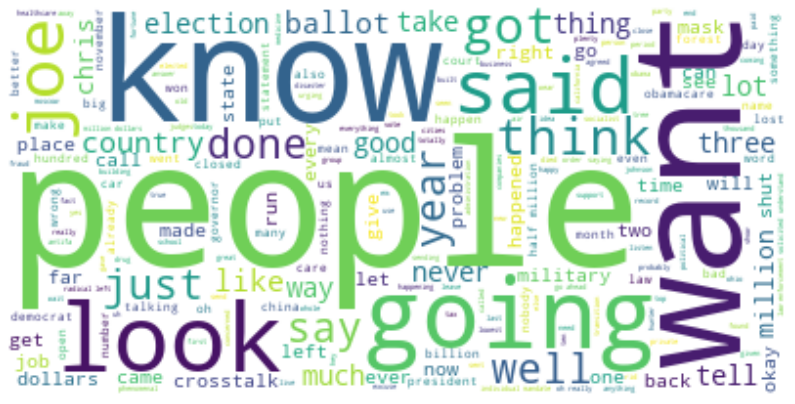

In [29]:
# re-generate the word cloud
trump_wc.generate(data_trump_clean)

# display the cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(trump_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

## Retrieving the image for the mask

In [30]:
# save mask to mx_mask
mx_mask = np.array(Image.open('usa.png'))

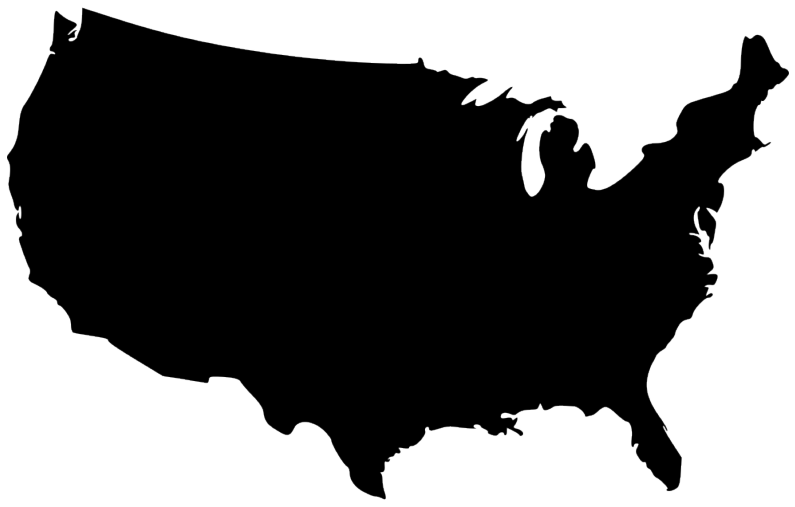

In [31]:
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(mx_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

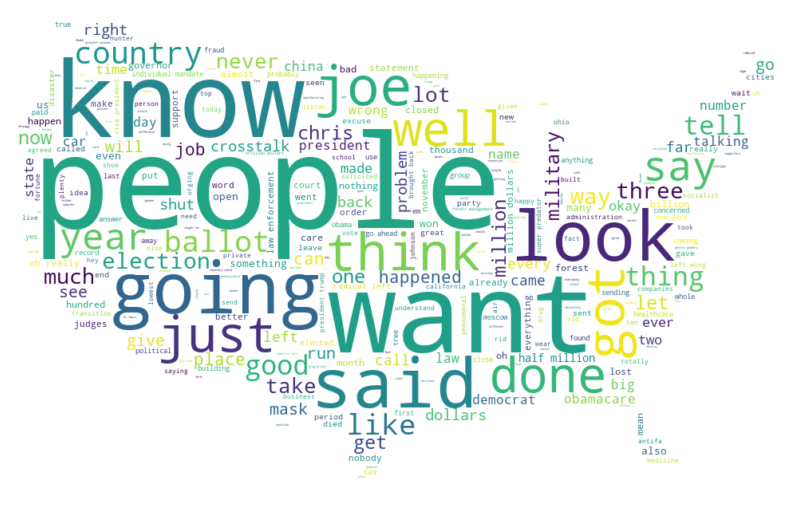

In [32]:
# instantiate a word cloud object
trump_wc = WordCloud(background_color='white', max_words=2000, mask=mx_mask, stopwords=stop_words)

# generate the word cloud
trump_wc.generate(data_trump_clean)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height


plt.imshow(trump_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

## Prepare the data for ploting and counting the words

In [33]:
filtered_words = [word for word in data_trump_clean.split() if word not in stop_words]
counted_words = collections.Counter(filtered_words)

words = []
counts = []
for letter, count in counted_words.most_common(10):
    words.append(letter)
    counts.append(count)

<BarContainer object of 10 artists>

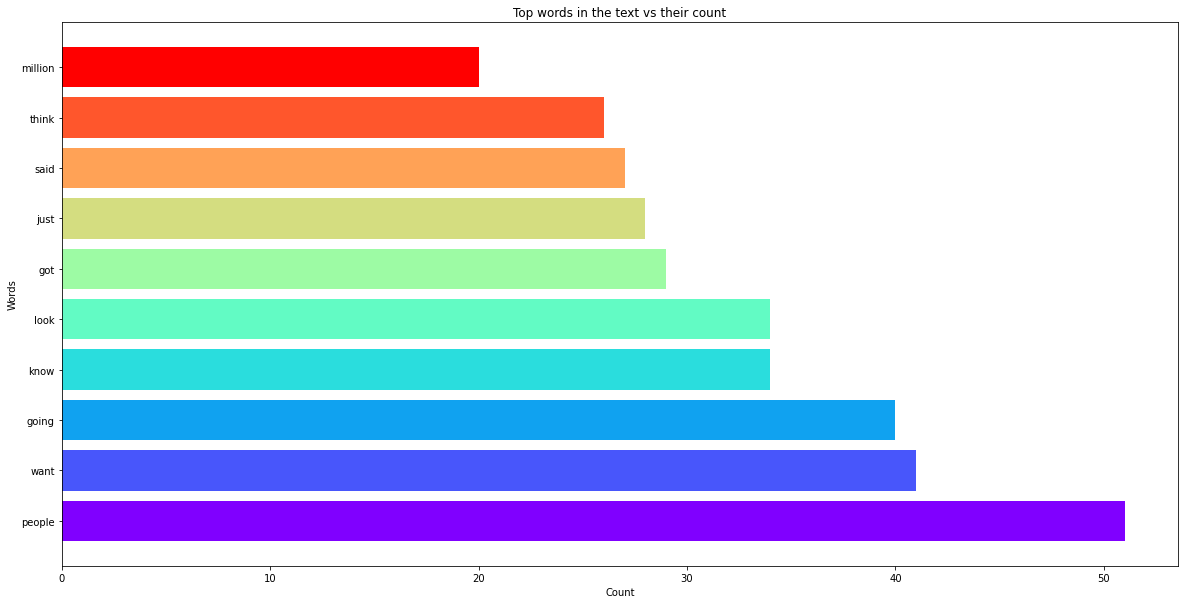

In [34]:
colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10

plt.title('Top words in the text vs their count')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(words, counts, color=colors)

## Biden's wordcloud

For the second wordcloud, we repeat the same process.

In [35]:
# we split the data using the word "BIDEN"
data_b = data.split('BIDEN')

In [36]:
# then, we split the word "TRUMP" and only keep Biden's quotes.
data_bt = []
aux_bt = []
for i in range(len(data_b)-1):
    
    aux_bt.append(data_b[i].split('TRUMP'))
        
    data_bt.append(aux_bt[i][0].lstrip(':\\xa0'))

In [37]:
# now, we split the word "WALLACE" to remove the moderator's quotes.
data_btw = []
aux_btw = []
for i in range(len(data_bt)-1):
    
    aux_btw.append(data_bt[i].split('WALLACE'))
    
    data_btw.append(aux_btw[i][0].lstrip(':\\xa0'))

In [38]:
# the result is this one, an array of Biden's quotes.
data_btw

["['Presidential Debate at Case Western Reserve University and Cleveland Clinic in Cleveland, Ohio', 'September 29, 2020', 'PARTICIPANTS:\\nFormer Vice President Joe Biden (D) and\\nPresident Donald Trump (R)', 'MODERATOR:\\nChris Wallace (Fox News)', '",
 "How you doing, man?', '",
 "I’m well.', '",
 "Well, first of all, thank you for doing this and looking forward to this, Mr. President.', '",
 "The American people have a right to have a say in who the Supreme Court nominee is and that say occurs when they vote for United States Senators and when they vote for the President of United States. They’re not going to get that chance now because we’re in the middle of an election already. The election has already started. Tens of thousands of people already voted and so the thing that should happen is we should wait. We should wait and see what the outcome of this election is because that’s the only way the American people get to express their view is by who they elect as President and who

In [39]:
# we remove the first element because it isn't a Biden quote.
data_btw.pop(0)

"['Presidential Debate at Case Western Reserve University and Cleveland Clinic in Cleveland, Ohio', 'September 29, 2020', 'PARTICIPANTS:\\nFormer Vice President Joe Biden (D) and\\nPresident Donald Trump (R)', 'MODERATOR:\\nChris Wallace (Fox News)', '"

In [40]:
# now, we join every array into a string
data_biden = ''.join(data_btw)
# it has a length of 35898 words in total, less than Trump
len(data_biden)

35898

In [41]:
# the transcription had a mistake using the wrong apostrophe, so we fix this to avoid future errors.
data_biden_clean = data_biden.replace("’", "'")
# also, all the string is converted to lowercase
data_biden_clean = data_biden_clean.lower()

In [42]:
# finally, we have a string of all the Biden's quotes.
data_biden_clean

"how you doing, man?', 'i'm well.', 'well, first of all, thank you for doing this and looking forward to this, mr. president.', 'the american people have a right to have a say in who the supreme court nominee is and that say occurs when they vote for united states senators and when they vote for the president of united states. they're not going to get that chance now because we're in the middle of an election already. the election has already started. tens of thousands of people already voted and so the thing that should happen is we should wait. we should wait and see what the outcome of this election is because that's the only way the american people get to express their view is by who they elect as president and who they elect as vice president.', 'now, what's at stake here is the president's made it clear, he wants to get rid of the affordable care act. he's been running on that, he ran on that and he's been governing on that. he's in the supreme court right now trying to get rid o

In [43]:
#initiate world cloud object
biden_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stop_words
)

# generate the word cloud
biden_wc.generate(data_biden_clean)

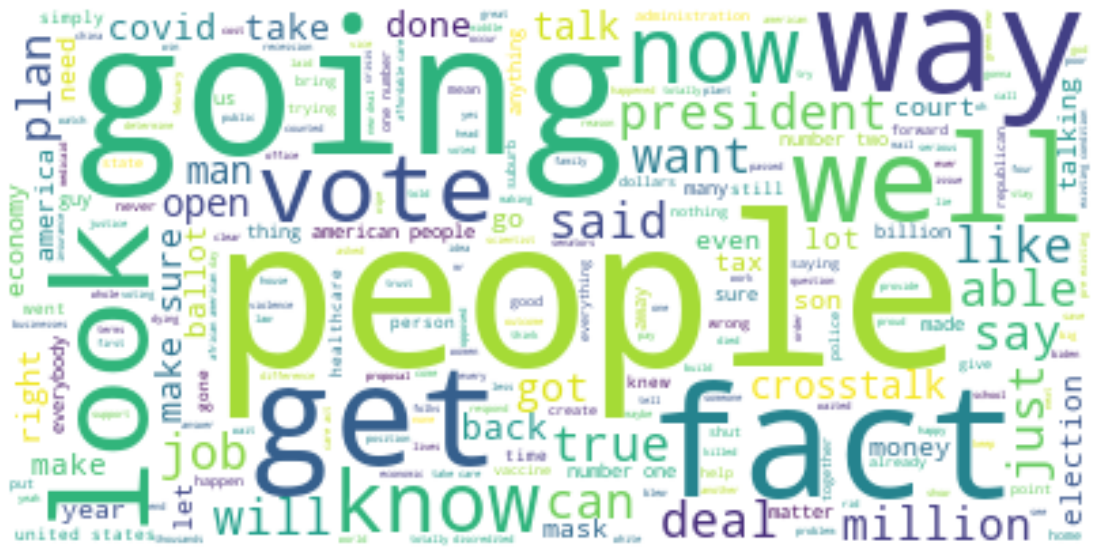

In [44]:
# display the word cloud
plt.imshow(biden_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

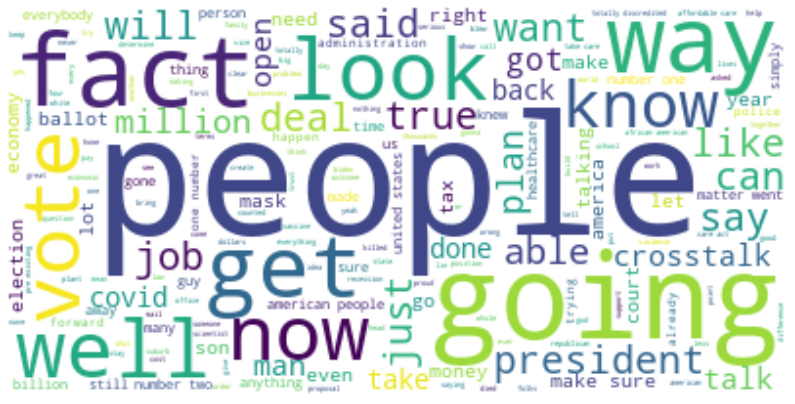

In [45]:
# re-generate the word cloud
biden_wc.generate(data_biden_clean)

# display the cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(biden_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

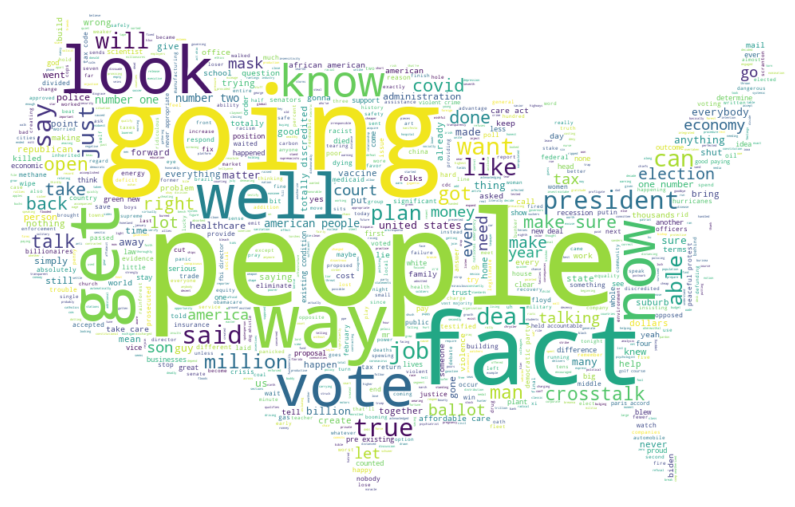

In [46]:
# instantiate a word cloud object
biden_wc = WordCloud(background_color='white', max_words=2000, mask=mx_mask, stopwords=stop_words)

# generate the word cloud
biden_wc.generate(data_biden_clean)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height


plt.imshow(biden_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [47]:
filtered_words = [word for word in data_biden_clean.split() if word not in stop_words]
counted_words = collections.Counter(filtered_words)

words = []
counts = []
for letter, count in counted_words.most_common(10):
    words.append(letter)
    counts.append(count)

<BarContainer object of 10 artists>

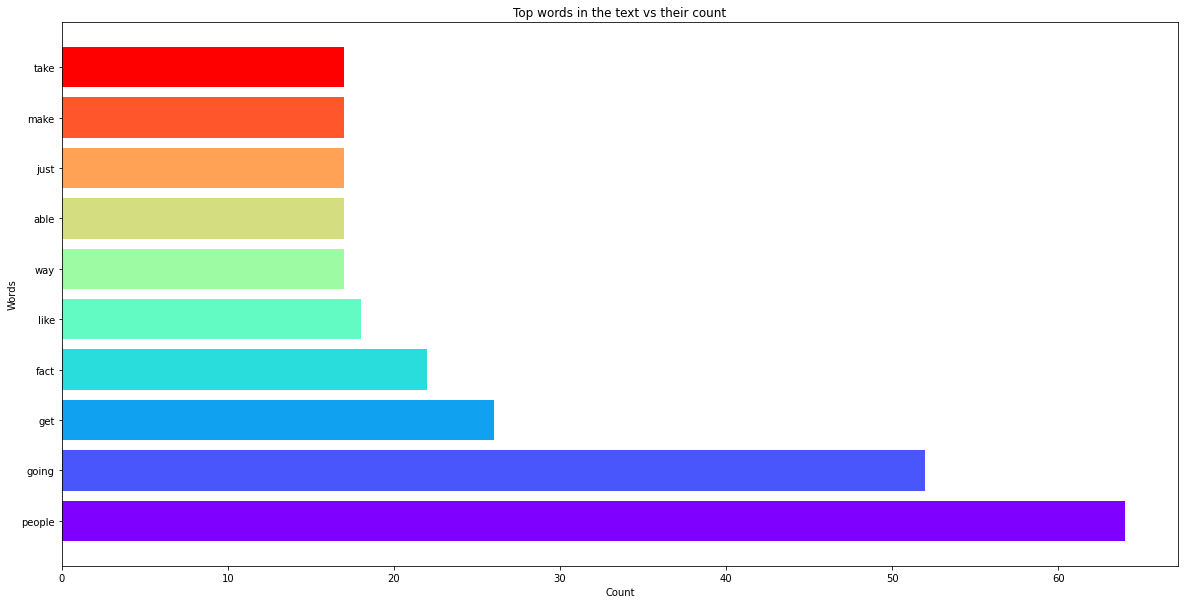

In [48]:
colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10

plt.title('Top words in the text vs their count')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(words, counts, color=colors)

## Results

#### Donald Trump's top 10 words

1. people (51)
2. want (41)
3. going (40)
4. know (34)
5. look (34)
6. got (29)
7. just (28)
8. said (27)
9. think (26)
10. million (20)

#### Joe Biden's top 10 words

1. people (64)
2. going (52)
3. get (26)
4. fact (22)
5. like (18)
6. way (17)
7. able (17)
8. just (17)
9. make (17)
10. take (17)

## Side by side

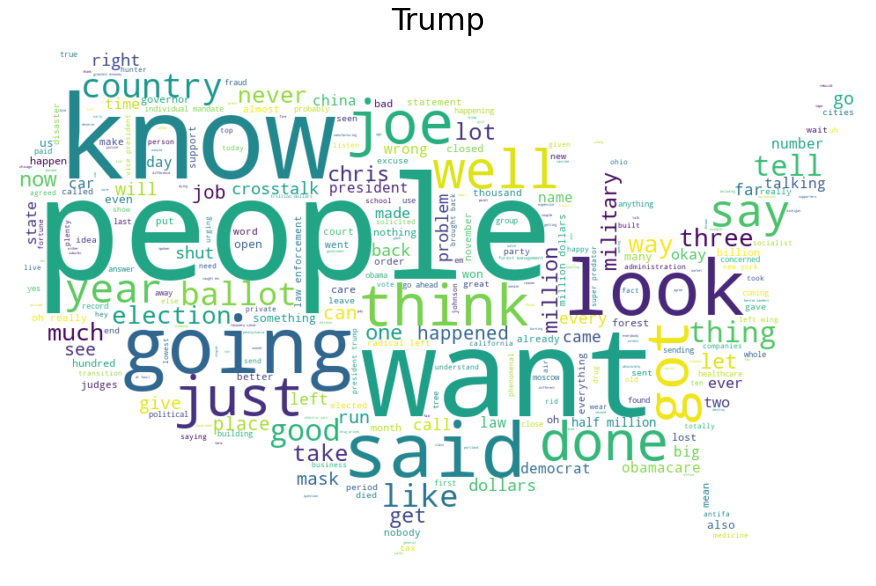

In [54]:
plt.imshow(trump_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Trump', fontsize = 30)
plt.show()

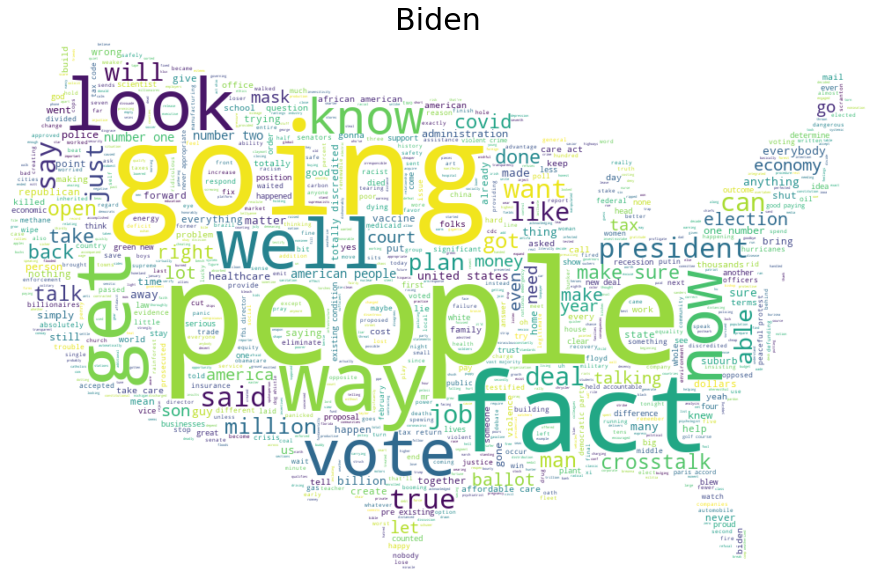

In [55]:
plt.imshow(biden_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Biden', fontsize = 30)
plt.show()

## Conclusion

As we can observe, Joe Biden as the challenger candidate uses to talk a lot more about the future and about the people. Also, he takes into account facts a lot more than his opponent.
In the other hand, Donald Trump as the current president at that time talks a lot more about what the people want and about the achievements his government just got.


Notice the differences between future (get, Biden's #3) and past (got, Trump's #6) aswell as both candidates styles: Biden sticking to facts (fact, #4) and Trump to emotions (think, #9; know, #4 and want, #2).

In conclusion, we can use this tool to get an idea of what the candidates' postures represent and how their ideas translate into the words they use.

Although we did not analyze deeply nor professionally the content of the transcript in this work, we can identify the main differences between the stances of both candidates.

## References

<a href="https://github.com/amueller/word_cloud/">https://github.com/amueller/word_cloud/</a>

<a href="https://matplotlib.org/">https://matplotlib.org/</a>

<a href="https://prowritingaid.com/art/425/What-the-Heck-is-a-Word-Cloud-and-Why-Would-I-Use-One.aspx">https://prowritingaid.com/art/425/What-the-Heck-is-a-Word-Cloud-and-Why-Would-I-Use-One.aspx</a>

<a href="https://www.debates.org/voter-education/debate-transcripts/september-29-2020-debate-transcript/">https://www.debates.org/voter-education/debate-transcripts/september-29-2020-debate-transcript/</a>

This notebook was made for a practice by <a href="https://mx.linkedin.com/in/christian-cabral-peniche-089bbb1b8">Christian Cabral</a> for the Business Inteligence subject imparted by <a href="https://www.linkedin.com/in/novelo-luis/">Luis Novelo</a> at Universidad Modelo.